In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sqlite3

In [13]:
df = pd.read_sql("select * from EBAY_TOP_BERLIN", sqlite3.connect("UsedObjects.db"))

In [22]:
df["RECORD_TIME"] = pd.to_datetime(df["RECORD_TIME"])
df['HOUR'] = df["RECORD_TIME"].dt.hour

In [27]:
df_pivot = df.pivot_table(index = "HOUR", columns = "PRODUCT", values = "LISTING_COUNT", aggfunc = "mean")

<AxesSubplot:xlabel='HOUR'>

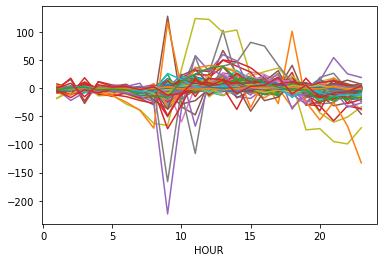

In [29]:
df_pivot.diff().plot(legend=False)